## **Análisis Exploratorio de Datos (EDA)**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df_est = pd.read_csv("../Data/raw/dataset_estudiantes.csv")


In [4]:
df_est.head()

,horas_estudio_semanal,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,tiene_tutor,horario_estudio_preferido,estilo_aprendizaje,nota_final,aprobado
0,8.957476,48.830601,86.640182,6.675694,25,Fácil,Sí,Tarde,Lectura/Escritura,84.4,1
1,11.042524,80.825707,83.449655,4.616844,18,Difícil,No,Tarde,NaN,72.0,1
2,4.510776,90.383694,74.623607,7.755246,25,Fácil,No,Mañana,Lectura/Escritura,80.0,1
3,6.647213,81.878257,82.849841,8.592826,23,Fácil,No,NaN,Visual,78.2,1
4,1.000000,66.254179,54.539935,6.671840,21,Medio,No,NaN,Auditivo,66.0,1


## Columnas del dataset

- **horas_estudio_semanal**: Número de horas de estudio a la semana.  
- **nota_anterior**: Nota que obtuvo el alumno en la convocatoria anterior.  
- **tasa_asistencia**: Tasa de asistencia a clase en porcentaje.  
- **horas_sueno**: Promedio de horas que duerme el alumno al día.  
- **edad**: Edad del alumno.  
- **nivel_dificultad**: Dificultad percibida por el alumno en el estudio (Fácil, Medio, Difícil).  
- **tiene_tutor**: Indica si el alumno cuenta con tutor (Sí/No).  
- **horario_estudio_preferido**: Horario en el que el alumno prefiere estudiar (Mañana, Tarde, Noche).  
- **estilo_aprendizaje**: Estilo de aprendizaje predominante (Visual, Auditivo, Lectura/Escritura, Kinestésico, etc.).  

## Variables objetivo

- **Para regresión**:  
  - `nota_final` → variable continua (0 a 100).  
- **Para clasificación**:  
  - `aprobado` → variable binaria (1 si la nota_final ≥ 60, 0 en caso contrario).  

In [5]:
print("Dimensiones:", df_est.shape)
print("\nTipos de datos:")
print(df_est.dtypes)
print("\nValores nulos:")
print(df_est.isnull().sum())

Dimensiones: (1000, 11)

Tipos de datos:
horas_estudio_semanal        float64
nota_anterior                float64
tasa_asistencia              float64
horas_sueno                  float64
edad                           int64
nivel_dificultad              object
tiene_tutor                   object
horario_estudio_preferido     object
estilo_aprendizaje            object
nota_final                   float64
aprobado                       int64
dtype: object

Valores nulos:
horas_estudio_semanal          0
nota_anterior                  0
tasa_asistencia                0
horas_sueno                  150
edad                           0
nivel_dificultad               0
tiene_tutor                    0
horario_estudio_preferido    100
estilo_aprendizaje            50
nota_final                     0
aprobado                       0
dtype: int64


## Información general del dataset

- El dataset contiene **1000 filas (estudiantes) y 11 columnas (variables)**.  
- Las variables se dividen en:
  - **Numéricas**:  
    - `horas_estudio_semanal` → número de horas que estudia el alumno por semana.  
    - `nota_anterior` → calificación de la evaluación anterior.  
    - `tasa_asistencia` → porcentaje de asistencia a clase.  
    - `horas_sueno` → horas promedio de sueño al día.  
    - `edad` → edad del estudiante.  
    - `nota_final` → calificación final (variable objetivo para regresión).  
  - **Categóricas**:  
    - `nivel_dificultad` → percepción de dificultad del estudio (Fácil, Medio, Difícil).  
    - `tiene_tutor` → indica si cuenta con tutor (Sí/No).  
    - `horario_estudio_preferido` → preferencia horaria (Mañana, Tarde, Noche).  
    - `estilo_aprendizaje` → estilo predominante (Visual, Auditivo, Kinestésico, etc.).  
  - **Variable binaria**:  
    - `aprobado` → indica si el alumno aprueba (1) o suspende (0).  

- **Valores nulos**:  
  - Se observan valores faltantes en algunas variables categóricas como `estilo_aprendizaje` y `horario_estudio_preferido`.  
  - Esto significa que no todos los estudiantes respondieron a estas preguntas.  
  - En el preprocesamiento será necesario decidir cómo tratarlos (rellenar, eliminar o crear una categoría “Desconocido”).  


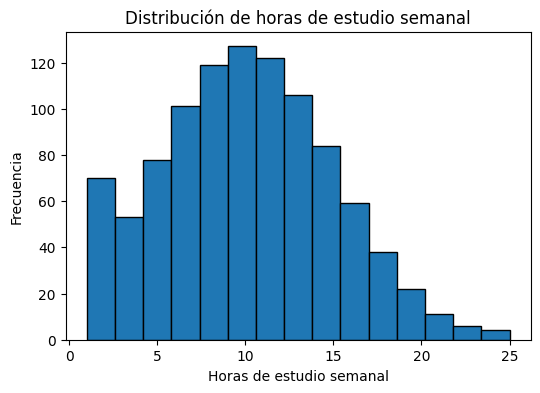

In [6]:
# Horas de estudio semanal
plt.figure(figsize=(6,4))
plt.hist(df_est["horas_estudio_semanal"], bins=15, edgecolor="black")
plt.xlabel("Horas de estudio semanal")
plt.ylabel("Frecuencia")
plt.title("Distribución de horas de estudio semanal")
plt.show()

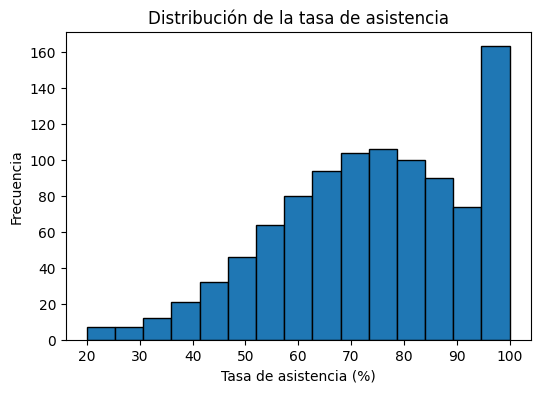

In [7]:
# Tasa de asistencia
plt.figure(figsize=(6,4))
plt.hist(df_est["tasa_asistencia"], bins=15, edgecolor="black")
plt.xlabel("Tasa de asistencia (%)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la tasa de asistencia")
plt.show()

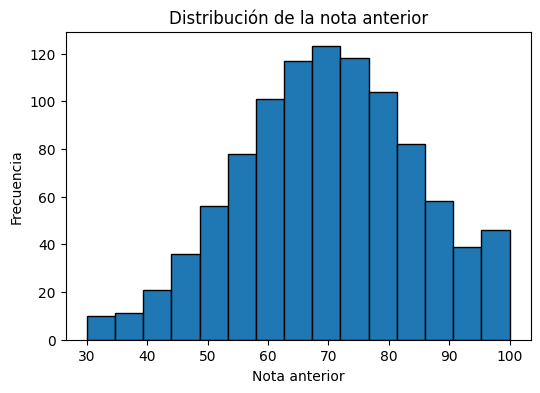

In [8]:
# Nota anterior
plt.figure(figsize=(6,4))
plt.hist(df_est["nota_anterior"], bins=15, edgecolor="black")
plt.xlabel("Nota anterior")
plt.ylabel("Frecuencia")
plt.title("Distribución de la nota anterior")
plt.show()

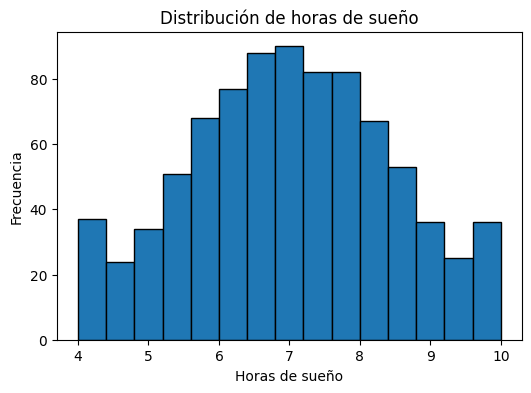

In [9]:
# Horas de sueño
plt.figure(figsize=(6,4))
plt.hist(df_est["horas_sueno"], bins=15, edgecolor="black")
plt.xlabel("Horas de sueño")
plt.ylabel("Frecuencia")
plt.title("Distribución de horas de sueño")
plt.show()

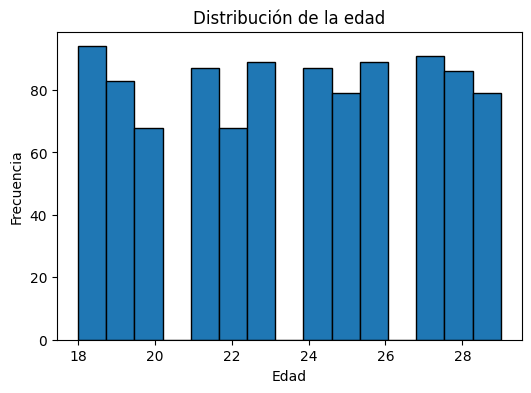

In [10]:
# Edad
plt.figure(figsize=(6,4))
plt.hist(df_est["edad"], bins=15, edgecolor="black")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribución de la edad")
plt.show()

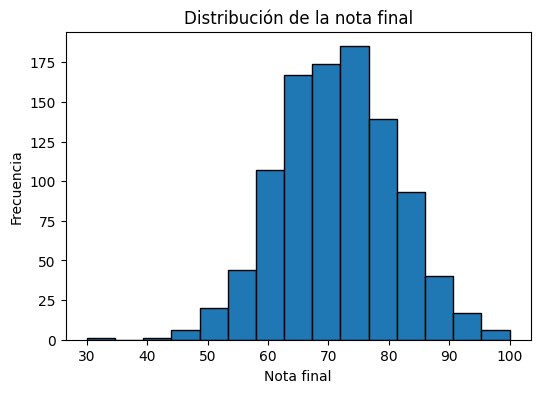

In [11]:
# Nota final
plt.figure(figsize=(6,4))
plt.hist(df_est["nota_final"], bins=15, edgecolor="black")
plt.xlabel("Nota final")
plt.ylabel("Frecuencia")
plt.title("Distribución de la nota final")
plt.show()

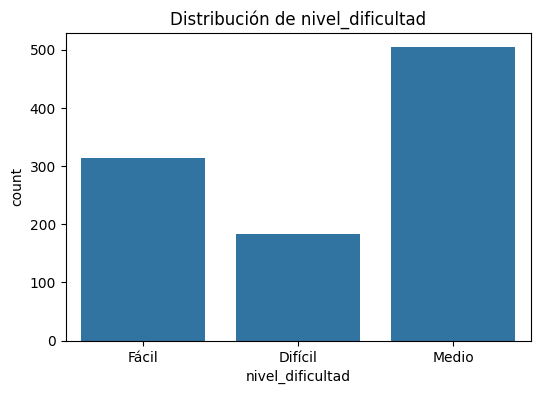

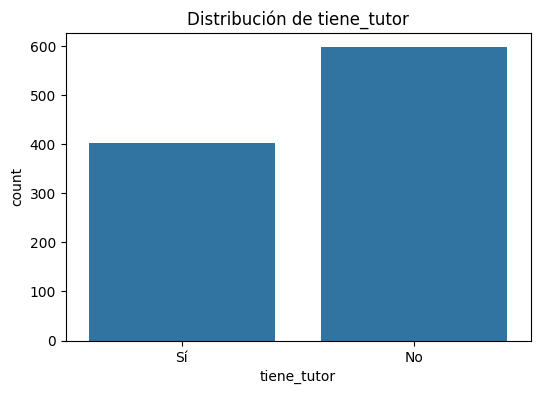

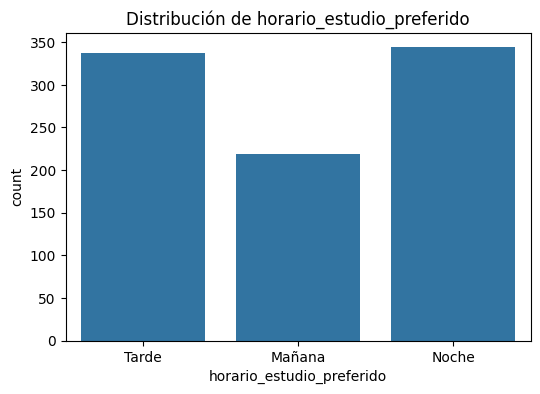

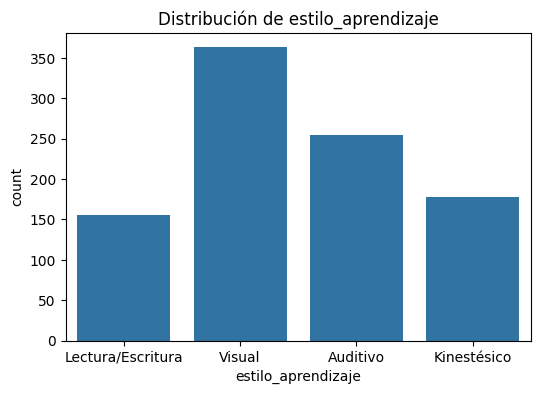

In [12]:
# Distribución de las variables categóricas
cat_cols = ["nivel_dificultad", "tiene_tutor", 
            "horario_estudio_preferido", "estilo_aprendizaje"]
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df_est[col])
    plt.title(f"Distribución de {col}")
    plt.show()


## Distribución de variables numéricas

- **Horas de estudio semanal**: La mayoría de los estudiantes estudia entre 5 y 15 horas por semana, con un pico alrededor de las 10 horas. Pocos alumnos superan las 20 horas.  
- **Tasa de asistencia**: La asistencia se concentra en valores altos, especialmente cerca del 100%, aunque existen alumnos con asistencia baja (< 50%).  
- **Nota anterior**: Presenta una forma aproximadamente normal, con la mayoría de estudiantes entre 60 y 80 puntos.  
- **Horas de sueño**: La mayoría duerme entre 6 y 8 horas al día, lo cual es un rango saludable. Pocos extremos por debajo de 5 o por encima de 9 horas.  
- **Edad**: La distribución es bastante uniforme entre los 18 y 29 años.
- **Nota final**: También sigue una distribución parecida a la normal, centrada en 65-75 puntos. Hay pocos alumnos con notas muy bajas (< 40) o muy altas (≈100).  

## Distribución de variables categóricas

- **Nivel de dificultad**: La mayoría percibe el estudio como medio** o fácil, mientras que un grupo menor lo considera difícil.  
- **Tiene tutor**: Más de la mitad de los estudiantes no tienen tutor, aunque un número considerable sí cuenta con uno.  
- **Horario de estudio preferido**: Se reparten entre tarde** y noche casi por igual, con menos alumnos que prefieren la mañana. 
- **Estilo de aprendizaje**: El estilo visual es el más frecuente, seguido por auditivo. Los menos comunes son kinestésico y lectura/escritura.  


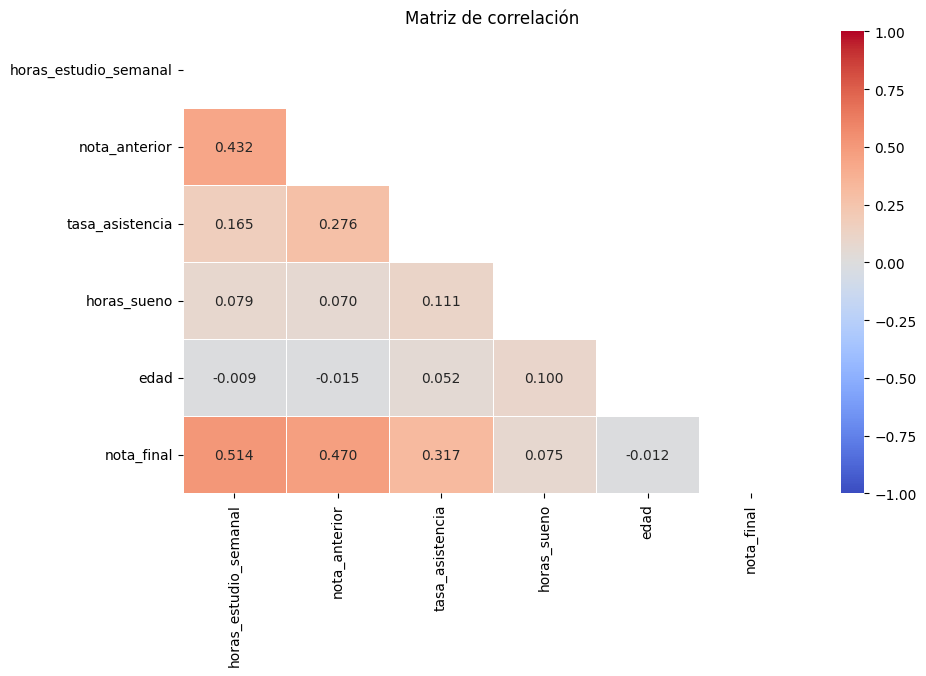

In [23]:
num_cols = ["horas_estudio_semanal", "nota_anterior", "tasa_asistencia", "horas_sueno", "edad", "nota_final"]
corr = df_est[num_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10,6))
sns.heatmap(corr, 
            annot=True, 
            cmap="coolwarm", 
            mask=mask,
            fmt=".3f", #Deminales
            linewidths=0.5, # Grosor de las líneas
            vmin=-1,
            vmax=1)
plt.title("Matriz de correlación")
plt.show()

## Correlaciones entre variables numéricas

En el mapa de correlación triangular se observan las siguientes relaciones destacadas:

- **Nota anterior vs. Nota final**: Existe una correlación positiva. Esto indica que los estudiantes que obtuvieron buenas notas previamente tienden a mantener un buen rendimiento.  
- **Tasa de asistencia vs. Nota final**: Presenta también una correlación positiva moderada. Cuanto mayor es la asistencia a clase, mejor suele ser la nota final.  
- **Horas de estudio semanal vs. Nota final**: Relación alta positiva. Estudiar más ayuda.
- **Horas de sueño vs. Nota final**: La correlación es muy baja o casi nula, lo que sugiere que el número de horas dormidas no influye de manera clara en la nota final.  
- **Edad vs. Nota final**: No se aprecia una relación significativa, la edad de los estudiantes no determina su rendimiento.

### Conclusión
Los factores que parecen más influyentes para la **nota_final** son:
1. **nota_anterior** (historial académico).  
2. **tasa_asistencia** (constancia en clase).  
3. Las **horas de estudio semanal**.  

Variables como la edad o las horas de sueño no muestran impacto claro en la calificación final.


A continuación vamos a deterctar los outliers mediante el graficado de boxplots.

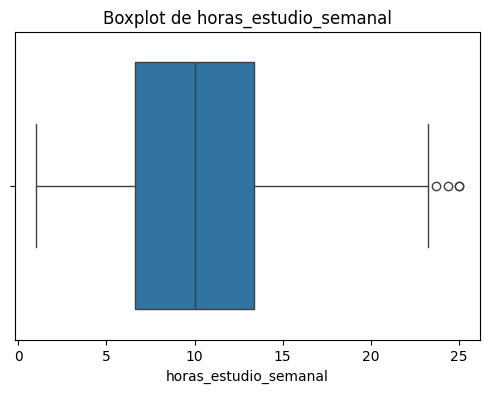

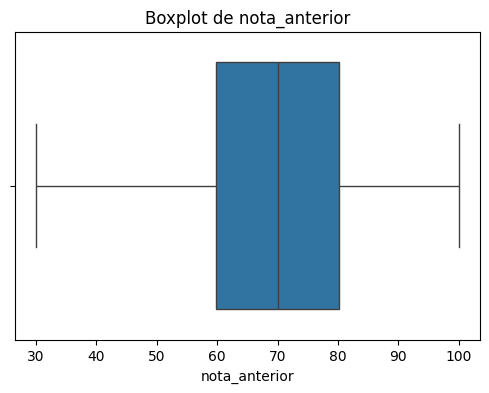

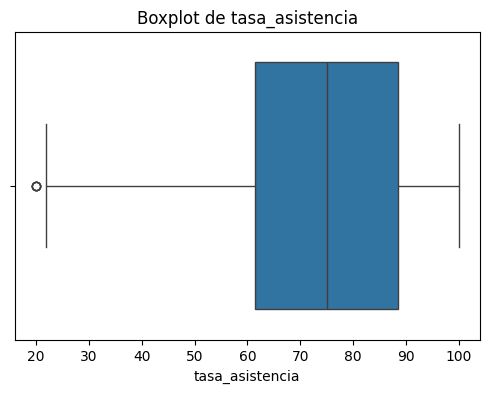

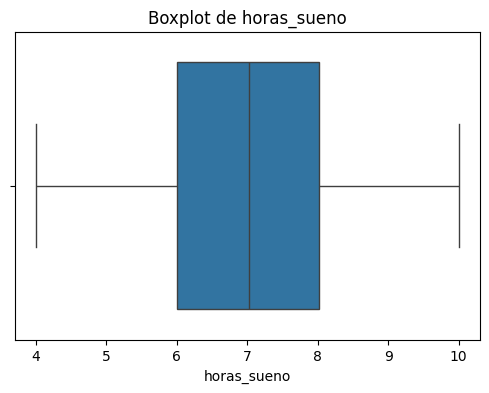

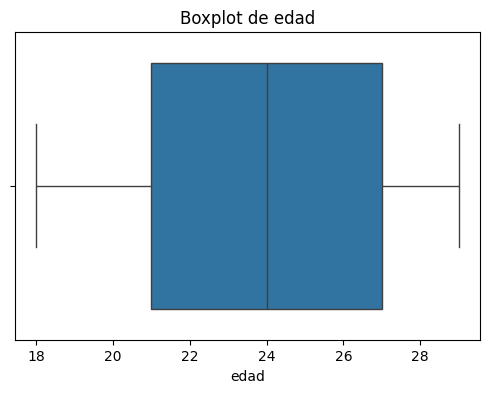

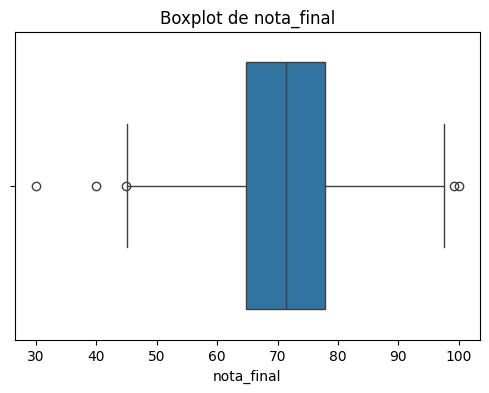

In [25]:
num_cols = ["horas_estudio_semanal", "nota_anterior", 
            "tasa_asistencia", "horas_sueno", "edad", "nota_final"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_est[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

## Conclusiones
- **Horas de estudio semanal**:    
  Se detectan algunos outliers (>20 horas), que representan casos poco comunes de estudiantes que dedican más de 20h semanales.  

- **Nota anterior**:  
  No se observan outliers significativos; casi todos los valores están entre 40 y 100.  

- **Tasa de asistencia**:  
  Existe un grupo reducido con valores muy bajos, considerados outliers.  

- **Horas de sueño**:  
  Pocos valores extremos, principalmente en los que duermen muy poco o bastante. 

- **Edad**:   
  No aparecen outliers, lo que indica un rango esperado para estudiantes universitarios.  

- **Nota final**:  
 La mayoría es estable, aunque existen casos extremos de suspensos muy bajos y sobresalientes.
